In [1]:
from __future__ import division
import numpy as np
np.seterr(divide='ignore') # these warnings are usually harmless for this code
from matplotlib import pyplot as plt
import os
import scipy.stats as stats

from hmmlearn import hmm
import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd

import sklearn as sk
from sklearn import decomposition

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# load session
mouse = '4139224.3'
df = pp.load_session_db()


#df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]

In [3]:
VRDat,C,Cd, S, A = pp.load_scan_sess(df_mouse.iloc[8])
# C = sp.stats.zscore(C,axis=0)
#C[C<3]=0
# trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
# C_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)

G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_002.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_002.mat
#subsystem#not made into numpy array
Anot made into numpy array
frame diff 0


In [4]:
pca = sk.decomposition.PCA()
C_pca = pca.fit_transform(C)

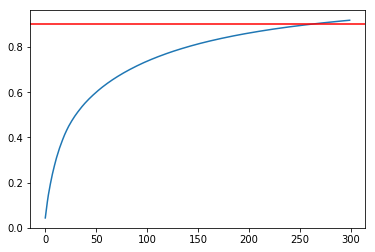

In [5]:
f,ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_[:300]))
ax.axhline(y=.9,xmin=0,xmax=250,color='red')

In [6]:
data = C_pca[:,:300]


In [32]:
model = hmm.GaussianHMM(n_components=100,covariance_type="full",n_iter=100,verbose=True)
model.fit(data)


         1   -16949650.8409             +nan
         2   -14591839.7753    +2357811.0657
         3   -14559959.3010      +31880.4743
         4   -14555915.7203       +4043.5807
         5   -14553628.4397       +2287.2805
         6   -14551757.9649       +1870.4748
         7   -14550616.3488       +1141.6160
         8   -14549822.2042        +794.1446
         9   -14549156.9301        +665.2741
        10   -14548716.5494        +440.3807
        11   -14548013.5604        +702.9890
        12   -14547798.7211        +214.8393
        13   -14547417.0135        +381.7075
        14   -14547306.6650        +110.3486
        15   -14547190.7697        +115.8953
        16   -14547079.4333        +111.3364
        17   -14546937.7450        +141.6883
        18   -14546833.9299        +103.8151
        19   -14546741.5965         +92.3334
        20   -14546620.3781        +121.2185
        21   -14546481.3683        +139.0097
        22   -14546409.1916         +72.1767
        23

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=100, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=True)

In [33]:
ss = model.predict(data) 

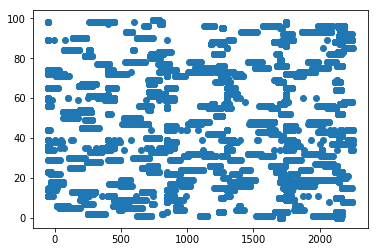

In [34]:
f, ax = plt.subplots()
ax.scatter((4*VRDat.morph*450)+VRDat.pos,ss)

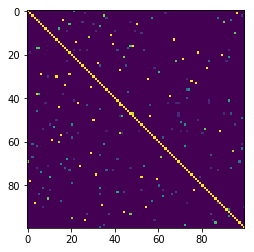

In [38]:
f,ax = plt.subplots()
#ax.hist(model.transmat_.ravel(),bins=50)
ax.imshow(model.transmat_,vmin=0,vmax=.02)

In [40]:
import sklearn.manifold
mds = sk.manifold.MDS(dissimilarity='precomputed')
emb=mds.fit_transform(1-model.transmat_)

ValueError: Array must be symmetric

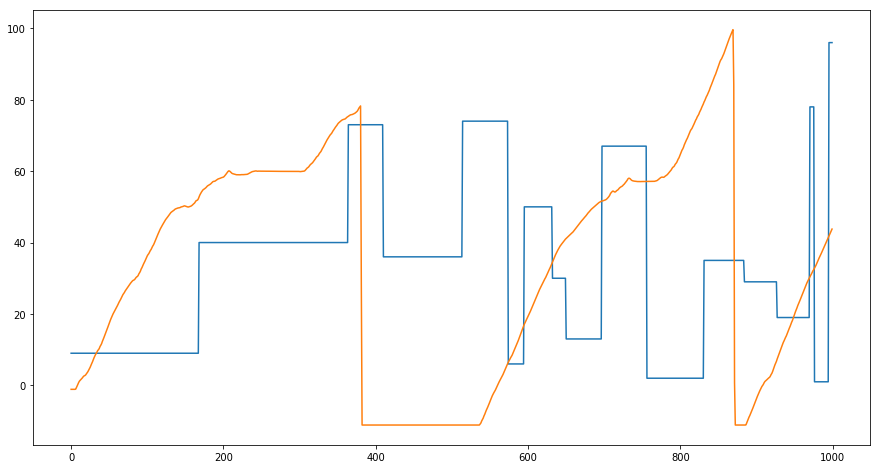

In [48]:
f,ax = plt.subplots(figsize=[15,8])
ax.plot(ss[:1000])
ax.plot(VRDat.pos._values[:1000]/450.*100)